LOAD DATA

In [1]:
# LOAD JSONS   train_data e test_data

import json
import pandas as pd
import os

# --- Define the path to our data ---
train_file_path = 'train.jsonl'
test_file_path  = 'test.jsonl'

train_data = []
test_data  = []

# --- Load TRAIN data ---
print(f"📦 Loading data from '{train_file_path}'...")
try:
    with open(train_file_path, 'r') as f:
        for line in f:
            train_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(train_data)} battles from train.")
    
    # Show structure of first train battle
    if train_data:
        print("\n--- Structure of the first train battle: ---")
        first_battle = train_data[0]
        battle_for_display = first_battle.copy()
        battle_for_display['battle_timeline'] = first_battle.get('battle_timeline', [])[:2]
        print(json.dumps(battle_for_display, indent=4))
        if len(first_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the training file at '{train_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


# --- Load TEST data ---
print(f"\n📦 Loading data from '{test_file_path}'...")
try:
    with open(test_file_path, 'r') as f:
        for line in f:
            test_data.append(json.loads(line))
    print(f"✅ Successfully loaded {len(test_data)} battles from test.")
    
    # Optional: inspect the first test battle
    if test_data:
        print("\n--- Structure of the first test battle: ---")
        first_test_battle = test_data[0]
        test_display = first_test_battle.copy()
        test_display['battle_timeline'] = test_display.get('battle_timeline', [])[:2]
        print(json.dumps(test_display, indent=4))
        if len(first_test_battle.get('battle_timeline', [])) > 3:
            print("    ...")
            print("    (battle_timeline has been truncated for display)")

except FileNotFoundError:
    print(f"❌ ERROR: Could not find the test file at '{test_file_path}'.")
    print("Please make sure you have added the competition data to this notebook.")


📦 Loading data from 'train.jsonl'...
✅ Successfully loaded 10000 battles from train.

--- Structure of the first train battle: ---
{
    "player_won": true,
    "p1_team_details": [
        {
            "name": "starmie",
            "level": 100,
            "types": [
                "psychic",
                "water"
            ],
            "base_hp": 60,
            "base_atk": 75,
            "base_def": 85,
            "base_spa": 100,
            "base_spd": 100,
            "base_spe": 115
        },
        {
            "name": "exeggutor",
            "level": 100,
            "types": [
                "grass",
                "psychic"
            ],
            "base_hp": 95,
            "base_atk": 95,
            "base_def": 85,
            "base_spa": 125,
            "base_spd": 125,
            "base_spe": 55
        },
        {
            "name": "chansey",
            "level": 100,
            "types": [
                "normal",
                "notype"
    

In [2]:
#Per vedere i dati in dataframe, divisi in 4 blocchi dove squadra==p1 e pokemon==p2
import pandas as pd

def create_dataframe(data):
    # DataFrame generale con info di base
    df_battle = pd.DataFrame([{
        "battle_id": b["battle_id"],
        "player_won": b.get("player_won", None)  # nel test non esiste
    } for b in data])

    # DataFrame con i Pokémon della squadra del giocatore (p1_team_details)
    df_squad = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "pokemon_name": p["name"],
            "level": p["level"],
            "types": p["types"],
            "base_hp": p["base_hp"],
            "base_atk": p["base_atk"],
            "base_def": p["base_def"],
            "base_spa": p["base_spa"],
            "base_spd": p["base_spd"],
            "base_spe": p["base_spe"]
        }
        for b in data
        for p in b["p1_team_details"]
    ])

    # DataFrame con dettagli del lead Pokémon dell'avversario
    df_pokemon = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "name": b["p2_lead_details"]["name"],
            "level": b["p2_lead_details"]["level"],
            "types": b["p2_lead_details"]["types"],
            "base_hp": b["p2_lead_details"]["base_hp"],
            "base_atk": b["p2_lead_details"]["base_atk"],
            "base_def": b["p2_lead_details"]["base_def"],
            "base_spa": b["p2_lead_details"]["base_spa"],
            "base_spd": b["p2_lead_details"]["base_spd"],
            "base_spe": b["p2_lead_details"]["base_spe"]
        }
        for b in data
    ])

    # DataFrame con la timeline dei turni
    df_battle_timeline = pd.DataFrame([
        {
            "battle_id": b["battle_id"],
            "turn": t["turn"],
            "p1_pokemon": t["p1_pokemon_state"]["name"],
            "p1_hp": t["p1_pokemon_state"]["hp_pct"],
            "p1_status": t["p1_pokemon_state"]["status"],
            "p1_effects": t["p1_pokemon_state"]["effects"],
            "p1_boosts": t["p1_pokemon_state"]["boosts"],
            "p2_pokemon": t["p2_pokemon_state"]["name"],
            "p2_hp": t["p2_pokemon_state"]["hp_pct"],
            "p2_status": t["p2_pokemon_state"]["status"],
            "p2_effects": t["p2_pokemon_state"]["effects"],
            "p2_boosts": t["p2_pokemon_state"]["boosts"],
            "p1_move_name": t["p1_move_details"]["name"] if t["p1_move_details"] else None,
            "p1_move_type": t["p1_move_details"]["type"] if t["p1_move_details"] else None,
            "p1_move_cat": t["p1_move_details"]["category"] if t["p1_move_details"] else None,
            "p1_move_basepow": t["p1_move_details"]["base_power"] if t["p1_move_details"] else None,
            "p1_move_acc": t["p1_move_details"]["accuracy"] if t["p1_move_details"] else None,
            "p1_move_priority": t["p1_move_details"]["priority"] if t["p1_move_details"] else None,
            "p2_move_name": t["p2_move_details"]["name"] if t["p2_move_details"] else None,
            "p2_move_type": t["p2_move_details"]["type"] if t["p2_move_details"] else None,
            "p2_move_cat": t["p2_move_details"]["category"] if t["p2_move_details"] else None,
            "p2_move_basepow": t["p2_move_details"]["base_power"] if t["p2_move_details"] else None,
            "p2_move_acc": t["p2_move_details"]["accuracy"] if t["p2_move_details"] else None,
            "p2_move_priority": t["p2_move_details"]["priority"] if t["p2_move_details"] else None
        }
        for b in data
        for t in b["battle_timeline"]
    ])

    return [df_battle, df_squad, df_pokemon, df_battle_timeline]

#train_data e test_data
#battle,squad,pokemon,timeline
train_list=create_dataframe(train_data)
test_list=create_dataframe(test_data)

FUNZIONI IMPORTANTI

In [3]:
#funzione per ottenere tutti i tipi di status e effetti(UNICI)
import pandas as pd
def unique_se(lista):
    df_battle_timeline=lista[3]
    # Unione dei due campi status
    all_status = pd.concat([
        df_battle_timeline['p1_status'],
        df_battle_timeline['p2_status']
    ], ignore_index=True)
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )
    unique_status = (
        all_status.dropna()
        .astype(str)
        .unique()
        .tolist()
    )   
    unique_status.remove("nostatus")
    print("status unici:", unique_status)

    all_effects = []

    for col in ["p1_effects", "p2_effects"]:
        for row in df_battle_timeline[col].dropna():
            if isinstance(row, list):
                all_effects.extend(row)
            elif isinstance(row, str):
                all_effects.append(row)

    unique_effects = sorted(set(all_effects))
    unique_effects.remove("noeffect")
    print("EFFECTS unici:", unique_effects)
    return unique_status,unique_effects

#unique_status,unique_effects=unique_se(train_list)

In [4]:
#Funzione per ottenere i tipi dei pokemon(UNICI)
def unique_t(lista):
    df_pokemon=lista[2]
    df_squad=lista[1]
    unique_types = sorted(
        set(
            t
            for types_list in pd.concat([df_pokemon["types"], df_squad["types"]])
            for t in types_list
        )
    )
    return unique_types

In [5]:
#Funzione che conta le occorrenze degli status
def status_counts(df, prefix,unique):
  counts = (
      df.groupby(['battle_id', f'{prefix}_status'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )

  counts = counts[['battle_id'] + unique]

  #Aggiungiamo tutti gli status presenti nel df
  for st in unique:
    if st not in counts.columns:
        counts[st] = 0
  
  counts.columns = ['battle_id'] + [f'{prefix}_status_{c}' for c in counts.columns if c != 'battle_id']
  return counts

In [6]:
#Funzione che conta le occorrenze degli effetti
from collections import Counter
import pandas as pd

def effects_counts(df, prefix,unique):
    rows = []
    for bid, group in df.groupby('battle_id'):
        all_effects = []
        for eff in group[f'{prefix}_effects'].dropna():
            if isinstance(eff, list):
                all_effects.extend(eff)
            elif isinstance(eff, str):
                all_effects.append(eff)
        # Conta le occorrenze di ogni effetto
        counts = Counter(all_effects)
        # Crea un dizionario con battle_id + contatori
        rows.append({'battle_id': bid, **counts})

    # 🔹 Converte in DataFrame
    eff_df = pd.DataFrame(rows).fillna(0)

    # 🔹 Aggiungi eventuali colonne mancanti per effetti non osservati
    for eff in unique:
        if eff not in eff_df.columns:
            eff_df[eff] = 0

    # 🔹 Riordina le colonne secondo l’ordine di unique_effects
    eff_df = eff_df[['battle_id'] + unique]

    # 🔹 Rinomina con prefisso (p1_effect_xxx, p2_effect_xxx, ...)
    eff_df.columns = ['battle_id'] + [f'{prefix}_effect_{c}' for c in unique]

    return eff_df

In [7]:
#Funziojne per MOSSE: TIPO E CATEGORIA (TO-DOO)
def move_type_counts(df, prefix):
  type_counts = (
      df.groupby(['battle_id', f'{prefix}_move_type'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  type_counts.columns = ['battle_id'] + [f'{prefix}_movetype_{c}' for c in type_counts.columns if c != 'battle_id']

  cat_counts = (
      df.groupby(['battle_id', f'{prefix}_move_cat'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
  )
  cat_counts.columns = ['battle_id'] + [f'{prefix}_movecat_{c}' for c in cat_counts.columns if c != 'battle_id']

  return type_counts.merge(cat_counts, on='battle_id', how='outer').fillna(0)


In [8]:
import pandas as pd
def boosts_sum(df):
    """
    Somma i valori di atk, def, spa, spd, spe per ciascun battle_id e giocatore (p1 e p2).
    """
    rows = []

    for bid, group in df.groupby('battle_id'):
        # inizializza accumulatori
        p1_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}
        p2_tot = {'atk': 0, 'def': 0, 'spa': 0, 'spd': 0, 'spe': 0}

        for _, row in group.iterrows():
            # somma i valori del dizionario se esistono
            if isinstance(row.get('p1_boosts'), dict):
                for k in p1_tot.keys():
                    p1_tot[k] += row['p1_boosts'].get(k, 0)
            if isinstance(row.get('p2_boosts'), dict):
                for k in p2_tot.keys():
                    p2_tot[k] += row['p2_boosts'].get(k, 0)

        # crea un'unica riga per la battaglia
        rows.append({
            'battle_id': bid,
            **{f'p1_boost_{k}': v for k, v in p1_tot.items()},
            **{f'p2_boost_{k}': v for k, v in p2_tot.items()}
        })

    return pd.DataFrame(rows)


In [9]:
import pandas as pd
#VITA RIMASTA AI POKEMON CHE NON SONO MORTI DURANTE I PRIMI 30 ROUND
def extract_hp_sum(df):

    def last_hp_sum(df, pokemon_col, hp_col):
        # Prende l'ultimo HP registrato per ciascun Pokémon in ciascuna battaglia
        last_hp = (
            df.dropna(subset=[pokemon_col])
              .sort_values(['battle_id', pokemon_col, 'turn'])
              .groupby(['battle_id', pokemon_col], as_index=False)
              .last()[['battle_id', hp_col]]
        )
        # Somma HP rimanenti per battaglia
        return last_hp.groupby('battle_id')[hp_col].sum().rename(f"somma_{pokemon_col[:2]}")

    somma_p1 = last_hp_sum(df, 'p1_pokemon', 'p1_hp')
    somma_p2 = last_hp_sum(df, 'p2_pokemon', 'p2_hp')

    result = pd.concat([somma_p1, somma_p2], axis=1).reset_index().fillna(0)
    
    #NUMERO DI POKEMON
    n_pokemon = (
        df.groupby('battle_id')
        .agg({
            'p1_pokemon': lambda x: len(set(x.dropna())),
            'p2_pokemon': lambda x: len(set(x.dropna()))
        })
        .rename(columns={
            'p1_pokemon': 'p1_pokemon_used',
            'p2_pokemon': 'p2_pokemon_used'
        })
        .reset_index()
    )

    result = result.merge(n_pokemon, on='battle_id', how='left')
    
    # Aggiunge la vita dei Pokémon non usati 
    result['somma_p1'] = result['somma_p1'] + (6 - result['p1_pokemon_used'])
    result['somma_p2'] = result['somma_p2'] + (6 - result['p2_pokemon_used'])
    result['somma_diff_hp']=result['somma_p1']-result['somma_p2']

    return result[['battle_id', 'somma_diff_hp']]


SCALER

In [10]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

def scale_features(df: pd.DataFrame, exclude_cols: list = None):
    """
    Applica StandardScaler alle colonne numeriche di un DataFrame,
    escludendo quelle in exclude_cols (ad es. 'battle_id', 'player_won').

    Args:
        df (pd.DataFrame): il DataFrame da scalare
        exclude_cols (list, optional): colonne da escludere dallo scaling

    Returns:
        df_scaled (pd.DataFrame): DataFrame con feature scalate
        scaler (StandardScaler): oggetto scaler già fit
    """
    if exclude_cols is None:
        exclude_cols = []

    # Seleziona le colonne da scalare
    feature_cols = [col for col in df.columns if col not in exclude_cols]

    # Crea una copia per non modificare l'originale
    df_scaled = df.copy()

    # Inizializza lo scaler e applica fit_transform
    scaler = StandardScaler()
    df_scaled[feature_cols] = scaler.fit_transform(df_scaled[feature_cols])

    return df_scaled, scaler

FEATURE EXTRACTION--statica

Oss: modello con differenze ottiene acc=0.56 a differenza del baseline( quello in mystart con i valori base_hp ed ecc sia per p1 che p2) che ottiene 0.51

In [11]:
#Creazione del modello da allenare(Statico, prima del match)
#differenze tra squadra e primo pokemon del secondo 
import pandas as pd

def extract_feature_diff(lista,isTrain):
    df_battle = lista[0]
    df_pokemon = lista[2]
    df_squad = lista[1]

    unique_types = unique_t(lista)  # funzione che restituisce tutti i tipi unici

    # --- PLAYER 1 ---
    df_squad["types_clean"] = df_squad["types"].apply(lambda x: [t for t in x if t != "notype"])
    agg_squad1 = df_squad.groupby("battle_id").agg({
        "base_hp": "mean",
        "base_atk": "mean",
        "base_def": "mean",
        "base_spa": "mean",
        "base_spd": "mean",
        "base_spe": "mean",
        "level": "mean",
        "types_clean": lambda lst: [t for sub in lst for t in sub]
    }).reset_index()

    for t in unique_types:
        agg_squad1[t] = agg_squad1["types_clean"].apply(lambda lst: lst.count(t))

    agg_squad1 = (
        agg_squad1
        .drop(columns=["types_clean"])
        .add_prefix("p1_")
        .rename(columns={"p1_battle_id": "battle_id"})
    )

    # --- PLAYER 2 ---
    df_squad2 = df_pokemon.copy()
    df_squad2["types_clean"] = df_squad2["types"].apply(lambda x: [t for t in x if t != "notype"])
    for t in unique_types:
        df_squad2[t] = df_squad2["types_clean"].apply(lambda lst: lst.count(t))

    df_squad2 = df_squad2.drop(columns=["types_clean", "types", "name"], errors="ignore")
    agg_squad2 = df_squad2.add_prefix("p2_").rename(columns={"p2_battle_id": "battle_id"})

    # --- UNIONE FINALE ---
    agg_full = agg_squad1.merge(agg_squad2, on="battle_id", how="inner")
    agg_full = agg_full.merge(df_battle[["battle_id", "player_won"]], on="battle_id", how="left")
    
    #controllo per evitare errori durante test
    # Se il dataset è di train, converti la colonna; se è di test, lasciala così
    if isTrain:
        agg_full["player_won"] = agg_full["player_won"].astype(int)
    else:
        agg_full["player_won"] = None
    # --- DIFFERENZE TRA P1 E P2 ---
    base_stats = ["base_hp", "base_atk", "base_def", "base_spa", "base_spd", "base_spe", "level"]
    for stat in base_stats:
        col_p1 = f"p1_{stat}"
        col_p2 = f"p2_{stat}"
        diff_col = f"diff_{stat}"
        agg_full[diff_col] = agg_full[col_p1] - agg_full[col_p2]

    # --- X RIMUOVERE LE FEATURE ORIGINALI, sarebbero ridondanti 
    cols_to_drop = [f"p1_{s}" for s in base_stats] + [f"p2_{s}" for s in base_stats]
    agg_full = agg_full.drop(columns=cols_to_drop)
    #print(agg_full)
    return agg_full.fillna(0)

#extract_feature_diff(train_list)


FEATURE EXTRACTION -- STATICA+DINAMICA

In [12]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista,isTrain):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista,isTrain)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS 
    p1_status = status_counts(df_battle_timeline, 'p1',unique_status)
    p2_status = status_counts(df_battle_timeline, 'p2',unique_status)

    #EFFETTI
    p1_effects = effects_counts(df_battle_timeline, 'p1',unique_effects)
    p2_effects = effects_counts(df_battle_timeline, 'p2',unique_effects)

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p1_status,
        p2_status,
        p1_effects,
        p2_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )
    print(train_df.columns)
    return train_df.fillna(0)

TRAINING DEL MODELLO -- statica

In [13]:
#CROSS-VALIDATION( K-FOLD )
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

train_df=extract_feature_diff(train_list,True)

#colonne da non scalare
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
            'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
       'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
       'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']
exclude=['battle_id','player_won']+type_cols

features = [col for col in train_df.columns if col not in exclude]

#Crea il ColumnTransformer che applichera lo scaler
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), features),
        ('pass_types', 'passthrough', type_cols)
    ],
    remainder='drop'
)

#Pipeline per il modello, applica lo scaler dentro ogni fold
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

#Cross validation
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# K-Fold stratificato
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for metric in ['accuracy', 'precision', 'recall', 'f1','roc_auc']:
    s = cross_val_score(pipe, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize():<10}: mean={s.mean():.3f} ± {s.std():.3f}")

y_pred = cross_val_predict(pipe, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=3))

Accuracy  : mean=0.562 ± 0.015
Precision : mean=0.562 ± 0.015
Recall    : mean=0.565 ± 0.029
F1        : mean=0.563 ± 0.020
Roc_auc   : mean=0.593 ± 0.013
[[2799 2201]
 [2177 2823]]
              precision    recall  f1-score   support

           0      0.562     0.560     0.561      5000
           1      0.562     0.565     0.563      5000

    accuracy                          0.562     10000
   macro avg      0.562     0.562     0.562     10000
weighted avg      0.562     0.562     0.562     10000



TRAINING DEL MODELLO -- statica+dinamica

Accuracy  : mean=0.833 ± 0.010
Precision : mean=0.836 ± 0.013
Recall    : mean=0.830 ± 0.019
F1        : mean=0.833 ± 0.011
Roc_auc   : mean=0.902 ± 0.011

In [14]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#colonne da non scalare
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=[ 'p1_status_par', 'p1_status_slp', 'p1_status_fnt', 'p1_status_frz',
       'p1_status_tox', 'p1_status_psn', 'p1_status_brn', 'p2_status_par',
       'p2_status_slp', 'p2_status_fnt', 'p2_status_frz', 'p2_status_tox',
       'p2_status_psn', 'p2_status_brn']

effect_cols=['p1_effect_clamp',
       'p1_effect_confusion', 'p1_effect_firespin', 'p1_effect_reflect',
       'p1_effect_substitute', 'p1_effect_typechange', 'p1_effect_wrap',
       'p2_effect_clamp', 'p2_effect_confusion', 'p2_effect_firespin',
       'p2_effect_reflect', 'p2_effect_substitute', 'p2_effect_typechange',
       'p2_effect_wrap']

exclude=['battle_id','player_won']#+type_cols+status_cols+effect_cols

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  type_cols + status_cols + effect_cols)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for metric in ['accuracy', 'precision', 'recall', 'f1','roc_auc']:
    s = cross_val_score(pipe, X, y, cv=cv, scoring=metric)
    print(f"{metric.capitalize():<10}: mean={s.mean():.3f} ± {s.std():.3f}")

y_pred = cross_val_predict(pipe, X, y, cv=cv)
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, digits=3))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal',
       ...
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER', 'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL',
       'p2_movecat_STATUS'],
      dtype='object', length=111)
['p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying', 'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water', 'diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base

In [15]:
#Analisi feauture per modello dinamico 
from sklearn.inspection import permutation_importance

pipe.fit(X, y)
r = permutation_importance(pipe, X, y, n_repeats=5, random_state=42)
sorted(zip(r.importances_mean, X.columns), reverse=True)[:10]

[(np.float64(0.26814000000000004), 'somma_diff_hp'),
 (np.float64(0.009680000000000022), 'p1_status_slp'),
 (np.float64(0.009560000000000058), 'p1_ghost'),
 (np.float64(0.006260000000000021), 'p2_movecat_STATUS'),
 (np.float64(0.005640000000000045), 'p2_movecat_SPECIAL'),
 (np.float64(0.0046200000000000685), 'p1_poison'),
 (np.float64(0.0046000000000000485), 'hp_diff_mean'),
 (np.float64(0.004100000000000037), 'p2_movetype_FIGHTING'),
 (np.float64(0.0033000000000000364), 'p1_status_par'),
 (np.float64(0.0031800000000000495), 'p1_ice')]

In [16]:
print(features)


['p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying', 'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon', 'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock', 'p2_water', 'diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp', 'p1_status_par', 'p1_status_slp', 'p1_status_fnt', 'p1_status_frz', 'p1_status_tox', 'p1_status_psn', 'p1_status_brn', 'p2_status_par', 'p2_status_slp', 'p2_status_fnt', 'p2_status_frz', 'p2_status_tox', 'p2_status_psn', 'p2_status_brn', 'p1_effect_clamp', 'p1_effect_confusion', 'p1_effect_firespin', 'p1_effect_reflect', 'p1_effect_substitute', 'p1_effect_typechange', 'p1_effect_wrap', 'p2_effect_clamp', 'p2_effect_confusion', 'p2_effect_firespin', 

AGGIUNTE AL MODELLO STATICO+DINAMICO PRECEDENTE 

FUNZINI PER AGGIUNGERE E MODIFICARE LE FEATURES BASE

In [17]:
def ragg_status(dff,unique):
    p1_status = status_counts(dff, 'p1',unique)
    p2_status = status_counts(dff, 'p2',unique)
    df = p1_status.merge(p2_status, on='battle_id', how='left').fillna(0)
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    # STUNNED: par, slp, frz
    df["p1_status_stunned"] = df["p1_status_par"] + df["p1_status_slp"] + df["p1_status_frz"]
    df["p2_status_stunned"] = df["p2_status_par"] + df["p2_status_slp"] + df["p2_status_frz"]

    # POISONED: tox, psn
    df["p1_status_poisoned"] = df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_poisoned"] = df["p2_status_tox"] + df["p2_status_psn"]

    # DMG_RESIDUO: brn + (tox, psn)
    df["p1_status_dmgresiduo"] = df["p1_status_brn"] + df["p1_status_tox"] + df["p1_status_psn"]
    df["p2_status_dmgresiduo"] = df["p2_status_brn"] + df["p2_status_tox"] + df["p2_status_psn"]

    # --- Differenze p1 - p2 ---
    df["diff_status_stunned"] = df["p1_status_stunned"] - df["p2_status_stunned"]
    df["diff_status_poisoned"] = df["p1_status_poisoned"] - df["p2_status_poisoned"]
    df["diff_status_dmgresiduo"] = df["p1_status_dmgresiduo"] - df["p2_status_dmgresiduo"]

    #survival rate
    df["p1_survival_rate"] = 1 - (df["p1_status_fnt"] / 6)
    df["p2_survival_rate"] = 1 - (df["p2_status_fnt"] / 6)
    df["diff_survival_rate"] = df["p1_survival_rate"] - df["p2_survival_rate"]
    
    return df[["battle_id","diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]].fillna(0)

In [18]:
def ragg_effects(dff,unique):
    p1_effects = effects_counts(dff, 'p1',unique)
    p2_effects = effects_counts(dff, 'p2',unique)
    df = p1_effects.merge(p2_effects, on='battle_id', how='left').fillna(0)
    
    # --- Raggruppamento per macro-categorie (sommando conteggi) ---
    df["p1_effect_trap"] = df[["p1_effect_clamp", "p1_effect_firespin", "p1_effect_wrap"]].sum(axis=1)
    df["p1_effect_buff"] = df[["p1_effect_reflect", "p1_effect_substitute"]].sum(axis=1)
    df["p1_effect_confuse"] = df["p1_effect_confusion"]
    df["p1_effect_transform"] = df["p1_effect_typechange"]

    df["p2_effect_trap"] = df[["p2_effect_clamp", "p2_effect_firespin", "p2_effect_wrap"]].sum(axis=1)
    df["p2_effect_buff"] = df[["p2_effect_reflect", "p2_effect_substitute"]].sum(axis=1)
    df["p2_effect_confuse"] = df["p2_effect_confusion"]
    df["p2_effect_transform"] = df["p2_effect_typechange"]

    #differenze 
    df["diff_effect_trap"] = df["p1_effect_trap"] - df["p2_effect_trap"]
    df["diff_effect_buff"] = df["p1_effect_buff"] - df["p2_effect_buff"]
    df["diff_effect_confuse"] = df["p1_effect_confuse"] - df["p2_effect_confuse"]

    return df[["battle_id","diff_effect_trap","diff_effect_buff","diff_effect_confuse","p1_effect_transform","p2_effect_transform"]].fillna(0)

In [19]:
#Creazione del modello da allenare(Dinamico , primi 30 round)
def extract_all(lista, is_train):
    unique_status,unique_effects=unique_se(lista)
    static_features=extract_feature_diff(lista, is_train)
    df_battle_timeline = lista[3]

    #Extract dynamic feature
    dynamic_features = df_battle_timeline.groupby('battle_id').agg({
        'p1_hp': 'mean', 
        'p2_hp': 'mean',
        'p1_move_basepow': 'mean',
        'p2_move_basepow': 'mean',
        'p1_move_acc': 'mean',
        'p2_move_acc': 'mean'
    }).reset_index()
    
    # Calcolo differenze p1 - p2
    dynamic_features['hp_diff_mean'] = dynamic_features['p1_hp'] - dynamic_features['p2_hp']
    dynamic_features['move_basepow_diff_mean'] = dynamic_features['p1_move_basepow'] - dynamic_features['p2_move_basepow']
    dynamic_features['move_acc_diff_mean'] = dynamic_features['p1_move_acc'] /dynamic_features['p2_move_acc']


    # Elimina le colonne usate per le differenze
    dynamic_features = dynamic_features.drop(columns=[
        'p1_hp', 'p2_hp',
        'p1_move_basepow', 'p2_move_basepow',
        'p1_move_acc', 'p2_move_acc'
    ])
    
    #vita rimasta ad ogni team( da un minimo di 0 a 6 perché 1 indica vita piena)
    tot_life=extract_hp_sum(df_battle_timeline)

    #STATUS raggruppamento 
    p_status = ragg_status(df_battle_timeline,unique_status) 

    #EFFETTI raggruppamento
    p_effects = ragg_effects(df_battle_timeline,unique_effects)    

    #(TO-DO) TIPI DI MOSSE E CATEGORIA
    p1_moves = move_type_counts(df_battle_timeline, 'p1')
    p2_moves = move_type_counts(df_battle_timeline, 'p2')

    #BOOSTS
    df_boosts=boosts_sum(df_battle_timeline)

    #MERGE DATASET
    dynamic_dfs = [
        dynamic_features,
        tot_life,
        p_status,
        p_effects,
        df_boosts,
        p1_moves, 
        p2_moves
    ]

    # Merge sequenziale (tutti su battle_id)
    dynamic_full = dynamic_dfs[0]
    for extra_df in dynamic_dfs[1:]:
        dynamic_full = dynamic_full.merge(extra_df, on='battle_id', how='left')
    
    # Merge statico 
    train_df = (
        static_features
        .merge(dynamic_full, on='battle_id', how='left')
    )

    #feature di interazione
    train_df["somma_diff_hp"] = (
        train_df["somma_diff_hp"] - train_df["somma_diff_hp"].mean()
    ) / train_df["somma_diff_hp"].std()
    print(train_df.columns)
    return train_df.fillna(0)

In [ ]:
#####################  Train new model-dynamics ##########################
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

train_df=extract_all(train_list,True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']
#per chiarezza divisione delle features
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER','p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level','move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp'] 

#features da non scalare: contatori
temp=type_cols+status_cols+effect_cols+move_type_cols+move_cat_cols
exclude=['battle_id','player_won']+temp

features = [col for col in train_df.columns if col not in exclude]
#debug 
print(features)


preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough',  temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === definisci CV stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]  # per ROC

# === metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {roc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))


status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

In [21]:
print(features)

['diff_base_hp', 'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean', 'move_acc_diff_mean', 'somma_diff_hp', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa', 'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def', 'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe']


In [22]:
#Analisi feauture per modello dinamico 
from sklearn.inspection import permutation_importance

pipe.fit(X, y)
r = permutation_importance(pipe, X, y, n_repeats=5, random_state=42)
sorted(zip(r.importances_mean, X.columns), reverse=True)

[(np.float64(0.28846000000000005), 'somma_diff_hp'),
 (np.float64(0.011880000000000047), 'p2_movecat_SPECIAL'),
 (np.float64(0.01154000000000006), 'diff_status_stunned'),
 (np.float64(0.011100000000000044), 'p1_ghost'),
 (np.float64(0.009480000000000044), 'p2_movecat_STATUS'),
 (np.float64(0.007740000000000036), 'p2_movetype_FIGHTING'),
 (np.float64(0.005260000000000042), 'p1_movetype_FIGHTING'),
 (np.float64(0.005200000000000027), 'hp_diff_mean'),
 (np.float64(0.00470000000000006), 'p1_poison'),
 (np.float64(0.004580000000000051), 'p2_movetype_NORMAL'),
 (np.float64(0.0043800000000000505), 'p1_ice'),
 (np.float64(0.0035000000000000586), 'diff_status_poisoned'),
 (np.float64(0.0033200000000000564), 'p1_movetype_NORMAL'),
 (np.float64(0.0030600000000000406), 'diff_base_def'),
 (np.float64(0.002860000000000018), 'p1_movetype_ICE'),
 (np.float64(0.0025200000000000556), 'diff_status_dmgresiduo'),
 (np.float64(0.002040000000000064), 'p1_movetype_ELECTRIC'),
 (np.float64(0.002020000000000021

In [23]:
#analisi multicollinearità e importanza
from sklearn.inspection import permutation_importance
perm = permutation_importance(pipe, X, y, scoring='roc_auc')
print(perm)

{'importances_mean': array([ 2.30000000e-05,  6.05120000e-05,  2.43280000e-05,  1.31427200e-03,
        9.79497600e-03,  4.55928000e-04,  2.49064000e-04,  2.44960800e-03,
        9.44640000e-05,  0.00000000e+00,  4.29605600e-03,  1.20576000e-03,
        2.49064000e-04,  2.38800000e-04,  7.66400000e-06,  1.19352000e-04,
        1.92000000e-07,  1.06432000e-04, -1.12880000e-05,  2.76400000e-04,
        3.46400000e-06,  6.04800000e-06,  2.82280000e-04,  0.00000000e+00,
        1.54616000e-04,  6.23672000e-04,  3.46400000e-06,  8.94456000e-04,
       -1.25600000e-05,  1.03073600e-03,  1.50047200e-03,  1.12400000e-05,
        1.12400000e-05,  1.54992000e-04,  2.59200000e-05,  3.38325600e-03,
        7.45752000e-04,  9.19920000e-05,  3.31223304e-01,  9.65201600e-03,
        2.50206400e-03,  2.46342400e-03,  5.29360000e-05,  3.43200000e-06,
        1.49892000e-03,  4.37120000e-05,  4.37120000e-05,  4.03408000e-04,
       -6.96000000e-07,  1.28080000e-05,  1.76880000e-05,  1.70528000e-04,
    

STAMPA SUBMISSION DEL MODELLO FINALE

In [24]:
#####################  Train new model-dynamics ##########################
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# === Caricamento dati ===
train_df = extract_all(train_list,True)
test_df = extract_all(test_list,False)  # <-- Assicurati di avere anche il test_list definito

# === Definizione X e y ===
X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# === Definizione feature groups ===
type_cols=[ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols=["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]

effect_cols=["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
             "p1_effect_transform","p2_effect_transform"]

boost_cols= [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]

move_type_cols=[ 'p1_movetype_ELECTRIC',
       'p1_movetype_FIGHTING', 'p1_movetype_FIRE', 'p1_movetype_FLYING',
       'p1_movetype_GHOST', 'p1_movetype_GRASS', 'p1_movetype_GROUND',
       'p1_movetype_ICE', 'p1_movetype_NORMAL', 'p1_movetype_POISON',
       'p1_movetype_PSYCHIC', 'p1_movetype_ROCK', 'p1_movetype_WATER',
       'p2_movetype_ELECTRIC', 'p2_movetype_FIGHTING', 'p2_movetype_FIRE',
       'p2_movetype_FLYING', 'p2_movetype_GHOST', 'p2_movetype_GRASS',
       'p2_movetype_GROUND', 'p2_movetype_ICE', 'p2_movetype_NORMAL',
       'p2_movetype_POISON', 'p2_movetype_PSYCHIC', 'p2_movetype_ROCK',
       'p2_movetype_WATER']

move_cat_cols=['p1_movecat_PHYSICAL', 'p1_movecat_SPECIAL', 'p1_movecat_STATUS',
        'p2_movecat_PHYSICAL', 'p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols= ['hp_diff_mean','diff_base_hp','diff_base_atk', 'diff_base_def', 
             'diff_base_spa', 'diff_base_spd', 'diff_base_spe', 'diff_level',
             'move_basepow_diff_mean','move_acc_diff_mean', 'somma_diff_hp']

# === Selezione delle feature da scalare ===
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# === Preprocessing ===
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

# === Pipeline finale ===
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# === Cross-validation stratificata ===
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Predizioni out-of-fold ===
y_pred = cross_val_predict(pipe, X, y, cv=cv, method='predict')
y_prob = cross_val_predict(pipe, X, y, cv=cv, method='predict_proba')[:, 1]

# === Metriche globali ===
acc = accuracy_score(y, y_pred)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc = roc_auc_score(y, y_prob)

print("=== Risultati Cross-Validation (10-fold) ===")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {roc:.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# === Fit finale su tutti i dati ===
pipe.fit(X, y)

# === Predizioni sul test set ===
X_test = test_df.drop(columns=['battle_id'])
print("\nGenerating predictions on the test set...")
test_predictions = pipe.predict(X_test)

# === Creazione del file di submission ===
submission_df = pd.DataFrame({
    'battle_id': test_df['battle_id'],
    'player_won': test_predictions
})

submission_df.to_csv('submission.csv', index=False)

print("\n✅ 'submission.csv' file created successfully!")
display(submission_df.head())
display(submission_df.nunique(axis=0))

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

C:\Users\axelr\AppData\Local\Temp\ipykernel_14728\3793724446.py:66: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return agg_full.fillna(0)


Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2

,battle_id,player_won
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1


battle_id     5000
player_won       2
dtype: int64

In [25]:
print(test_list[0]["battle_id"].nunique(), "battaglie uniche nel test set")

print(train_list[0]["battle_id"].nunique(), "battaglie uniche nel test set")


5000 battaglie uniche nel test set
10000 battaglie uniche nel test set


In [26]:
#!pip install xgboost

CONTROLLO DI VARI MODELLI

In [27]:
# 📦 Importa librerie
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

# 🧠 Funzione principale: train e valutazione
def train_and_evaluate_models(df, target_col="target", drop_cols=["battle_id"]):
    # 🔹 Dividi X e y
    X = df.drop(columns=drop_cols + [target_col])
    y = df[target_col]

    # 🔹 Split train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # 🔧 Modelli da confrontare
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
        "SVM (RBF kernel)": SVC(kernel='rbf', probability=True, random_state=42)
    }

    # 📊 Salva i risultati
    results = []

    for name, model in models.items():
        print(f"🔧 Training: {name}")

        # Usa uno scaler solo per modelli sensibili alla scala
        if name in ["Logistic Regression", "SVM (RBF kernel)"]:
            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('clf', model)
            ])
        else:
            pipeline = model

        # 🔁 Cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
        print(f"  ✅ CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

        # 🏁 Fit & Predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # 📈 Metriche
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc=roc_auc_score(y_test,y_pred)
        print(f"   Test Accuracy: {acc:.4f}")
        print(f"   F1 Score: {f1:.4f}")
        print(f"   ROC Score: {roc:.4f}")
        print("   Classification Report:")
        print(classification_report(y_test, y_pred))
        print("-" * 50)

        # 🔐 Salva risultati
        results.append({
            "Model": name,
            "CV Accuracy": scores.mean(),
            "Test Accuracy": acc,
            "F1 Score": f1
        })

    return pd.DataFrame(results).sort_values(by="Test Accuracy", ascending=False)


In [28]:
df = extract_all(train_list, is_train=True)
df=train_and_evaluate_models(df, target_col="player_won", drop_cols=["battle_id"])
print(df)

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

GRID SEARCH

status unici: ['par', 'slp', 'fnt', 'frz', 'tox', 'psn', 'brn']
EFFECTS unici: ['clamp', 'confusion', 'firespin', 'reflect', 'substitute', 'typechange', 'wrap']
Index(['battle_id', 'p1_dragon', 'p1_electric', 'p1_fire', 'p1_flying',
       'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice', 'p1_normal', 'p1_notype',
       'p1_poison', 'p1_psychic', 'p1_rock', 'p1_water', 'p2_dragon',
       'p2_electric', 'p2_fire', 'p2_flying', 'p2_ghost', 'p2_grass',
       'p2_ground', 'p2_ice', 'p2_normal', 'p2_notype', 'p2_poison',
       'p2_psychic', 'p2_rock', 'p2_water', 'player_won', 'diff_base_hp',
       'diff_base_atk', 'diff_base_def', 'diff_base_spa', 'diff_base_spd',
       'diff_base_spe', 'diff_level', 'hp_diff_mean', 'move_basepow_diff_mean',
       'move_acc_diff_mean', 'somma_diff_hp', 'diff_status_stunned',
       'diff_status_poisoned', 'diff_status_dmgresiduo', 'diff_effect_trap',
       'diff_effect_buff', 'diff_effect_confuse', 'p1_effect_transform',
       'p2_effect_transform', 

c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\axelr\miniconda3\envs\mio_env\Lib\site-packages\sklearn\pipe


=== Top 10 combinazioni per ROC AUC ===
    mean_test_score  std_test_score  rank_test_score  \
4          0.901473        0.005316                1   
6          0.901361        0.006067                2   
7          0.901323        0.006136                3   
8          0.901298        0.006271                4   
10         0.900984        0.006302                5   
11         0.900982        0.006307                6   
12         0.900772        0.006309                7   
14         0.900696        0.006318                8   
15         0.900576        0.006249                9   
2          0.899624        0.005687               10   

                                               params  
4   {'model__C': 0.1, 'model__penalty': 'l1', 'mod...  
6   {'model__C': 0.1, 'model__penalty': 'l2', 'mod...  
7   {'model__C': 0.1, 'model__penalty': 'l2', 'mod...  
8   {'model__C': 1, 'model__penalty': 'l1', 'model...  
10  {'model__C': 1, 'model__penalty': 'l2', 'model...  
11  {'

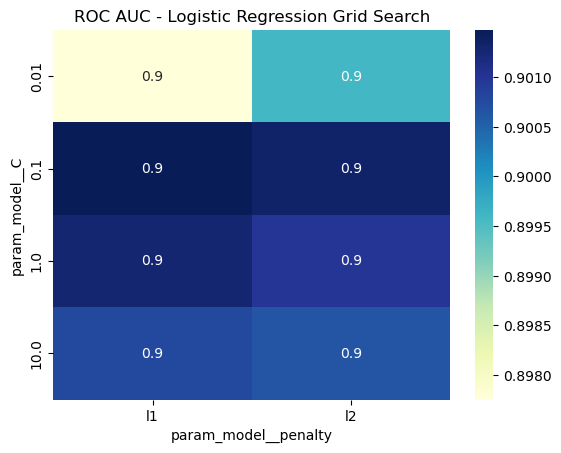

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# =======================
# 1️⃣  Estrazione e setup
# =======================
train_df = extract_all(train_list, True)

X = train_df.drop(columns=['player_won', 'battle_id'])
y = train_df['player_won']

# --- Definizione gruppi di feature ---
type_cols = [ 'p1_dragon', 'p1_electric','p1_fire', 'p1_flying',
        'p1_ghost', 'p1_grass', 'p1_ground', 'p1_ice',
        'p1_normal', 'p1_notype', 'p1_poison', 'p1_psychic', 'p1_rock',
        'p1_water', 'p2_dragon', 'p2_electric','p2_fire', 'p2_flying',
        'p2_ghost', 'p2_grass', 'p2_ground', 'p2_ice','p2_normal',
        'p2_notype', 'p2_poison', 'p2_psychic', 'p2_rock','p2_water']

status_cols = ["diff_status_stunned","diff_status_poisoned","diff_status_dmgresiduo"]
effect_cols = ["diff_effect_trap","diff_effect_buff","diff_effect_confuse",
               "p1_effect_transform","p2_effect_transform"]
boost_cols = [ 'p1_boost_atk', 'p1_boost_def', 'p1_boost_spa',
       'p1_boost_spd', 'p1_boost_spe', 'p2_boost_atk', 'p2_boost_def',
       'p2_boost_spa', 'p2_boost_spd', 'p2_boost_spe',]
move_type_cols = [ 'p1_movetype_ELECTRIC','p1_movetype_FIGHTING','p1_movetype_FIRE','p1_movetype_FLYING',
       'p1_movetype_GHOST','p1_movetype_GRASS','p1_movetype_GROUND','p1_movetype_ICE','p1_movetype_NORMAL',
       'p1_movetype_POISON','p1_movetype_PSYCHIC','p1_movetype_ROCK','p1_movetype_WATER',
       'p2_movetype_ELECTRIC','p2_movetype_FIGHTING','p2_movetype_FIRE','p2_movetype_FLYING','p2_movetype_GHOST',
       'p2_movetype_GRASS','p2_movetype_GROUND','p2_movetype_ICE','p2_movetype_NORMAL','p2_movetype_POISON',
       'p2_movetype_PSYCHIC','p2_movetype_ROCK','p2_movetype_WATER']
move_cat_cols = ['p1_movecat_PHYSICAL','p1_movecat_SPECIAL','p1_movecat_STATUS',
        'p2_movecat_PHYSICAL','p2_movecat_SPECIAL','p2_movecat_STATUS']

match_cols = ['hp_diff_mean','diff_base_hp','diff_base_atk','diff_base_def','diff_base_spa','diff_base_spd',
              'diff_base_spe','diff_level','move_basepow_diff_mean','move_acc_diff_mean','somma_diff_hp']

# --- Colonne da scalare / non scalare ---
temp = type_cols + status_cols + effect_cols + move_type_cols + move_cat_cols
exclude = ['battle_id','player_won'] + temp
features = [col for col in train_df.columns if col not in exclude]

# =======================
# 2️⃣  Pipeline
# =======================
preprocessor = ColumnTransformer([
    ('scale', StandardScaler(), features),
    ('pass_types', 'passthrough', temp)
], remainder='drop')

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=5000, random_state=42))
])

# =======================
# 3️⃣  Griglia iperparametri
# =======================
param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'lbfgs']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_logreg = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    refit=True,
    return_train_score=True,
    verbose=2
)

# =======================
# 4️⃣  Esecuzione GridSearch
# =======================
print("Eseguo la ricerca dei migliori iperparametri...\n")
grid_logreg.fit(X, y)

# =======================
# 5️⃣  Analisi risultati
# =======================
cv_results_df = pd.DataFrame(grid_logreg.cv_results_)

# Mostra le top 10 combinazioni ordinate per performance
print("\n=== Top 10 combinazioni per ROC AUC ===")
cols = ["mean_test_score", "std_test_score", "rank_test_score", "params"]
print(cv_results_df[cols].sort_values(by="mean_test_score", ascending=False).head(10))

# Riga e parametri migliori
best_row = cv_results_df.loc[[grid_logreg.best_index_]]
best_params = grid_logreg.best_params_
best_score = grid_logreg.best_score_

print("\n=== Miglior combinazione trovata ===")
print(best_row[["params", "mean_test_score", "std_test_score", "rank_test_score"]])
print("\nBest hyperparameters:", best_params)
print(f"Best ROC AUC score: {best_score:.4f}")

# =======================
# 6️⃣  Valutazione modello finale
# =======================
best_model = grid_logreg.best_estimator_

y_pred = best_model.predict(X)
y_prob = best_model.predict_proba(X)[:, 1]

print("\n=== Metriche sul dataset completo ===")
print(f"Accuracy : {accuracy_score(y, y_pred):.3f}")
print(f"Precision: {precision_score(y, y_pred):.3f}")
print(f"Recall   : {recall_score(y, y_pred):.3f}")
print(f"F1-score : {f1_score(y, y_pred):.3f}")
print(f"ROC AUC  : {roc_auc_score(y, y_prob):.3f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred, digits=3))

# =======================
# 7️⃣  Visualizzazione (opzionale)
# =======================
try:
    pivot_df = cv_results_df.pivot_table(
        index="param_model__C",
        columns="param_model__penalty",
        values="mean_test_score"
    )
    sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
    plt.title("ROC AUC - Logistic Regression Grid Search")
    plt.show()
except Exception as e:
    print("Impossibile generare la heatmap:", e)
